# Supervised learning

## Def.:
- Given the **predictor variable** or *feature, independent variable*, like measurements
- to build a model which is able to predict the **target variable** or *dependent variable, response variable*

## Different types of supervised learning
- classification: target variable consist of categories
- regression: target is a continuously varying variable

## Goal
- to learn from data for which the right output is known, so that we can make predictions on new data for which we don't know the output



# Exploratory Data Analysis (EDA)

In [1]:
from sklearn import datasets

import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt  

plt.style.use('ggplot')

# load build-in dataset in sklearn
iris = datasets.load_iris()

print(type(iris))
# the type of our dataset is bunch, which is similar to 
# a dictionary in that it contains key-value-pairs

print(iris.keys())


<class 'sklearn.utils._bunch.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [2]:
print(f'type of features: {type(iris.data)}' )
print(f'type of target: {type(iris.target)}')

type of features: <class 'numpy.ndarray'>
type of target: <class 'numpy.ndarray'>


In [3]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [4]:
iris.data.shape
# feature array has 150 rows and 4 columns --> 150 samples and 4 features

(150, 4)

In [5]:
print(f'feature names: {iris.feature_names}')
print(f'target names: {iris.target_names}')
print(f'target encoded in : {np.unique(iris.target)}')

feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target names: ['setosa' 'versicolor' 'virginica']
target encoded in : [0 1 2]


In [6]:
X = iris.data

y = iris.target

# use columns=iris.feature_names to set the column names as feature_names, rather than 0, 1, 2, 3
df = pd.DataFrame(X, columns=iris.feature_names)
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


## Visual EDA
- on the diagonal: histograms of features
- off-diagonal figures: scatter plots of the column feature versus row feature colored by the target variable

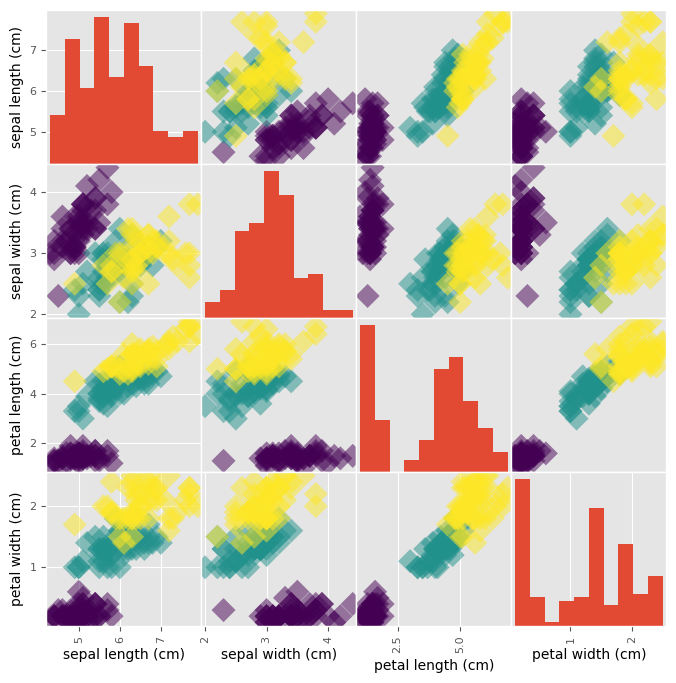

In [7]:
_ = pd.plotting.scatter_matrix(df, c = y, figsize=[8,8], s=150, marker='D')

# 1. Classification algorithm: KNN
All *machine learning models* in `scikit-learn` are implemented as **python classes**. These classes serve two purposes: they **implement** the algorithms for learning a model, and predicting, while also **storing** all the information that is learned from the data. 


Training a model on the data is also called **fitting** the model to the data. In scikit-learn, we use the `fit` method to do this. Similarly, the `predict` method is what we use to predict the label of an, unlabeled data point.


The scikit-learn API requires firstly that you have the data as a **NumPy array** or **pandas DataFrame**. It also requires that the ***features take on continuous values***, such as the price of a house, as opposed to categories, such as 'male' or 'female'. It also requires that there are **no missing values** in the data. 

In [8]:
# using sklearn to fit a classifier: knn
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6) #instantiation of the class
knn.fit(iris['data'], iris['target'])

KNeighborsClassifier(n_neighbors=6)

In [9]:
print(iris['data'].shape) # -> 150 observations of 4 features
print(iris.target.shape) # --> target needs to be a single column with the same number of observations as the feature data

(150, 4)
(150,)


In [10]:
# .csv does not provide us column names, so we need to add them in the dataframe manuely
col_names = ['party','infants','water','budget','physician','salvador','religious','satellite','aid','missile','immigration','synfuels','education','superfund','crime','duty_free_exports','eaa_rsa']

# import Congressional voting records dataset
df_voting = pd.read_csv('house-votes-84.csv', names=col_names)

print(df_voting.head())

        party infants water budget physician salvador religious satellite aid  \
0  republican       n     y      n         y        y         y         n   n   
1  republican       n     y      n         y        y         y         n   n   
2    democrat       ?     y      y         ?        y         y         n   n   
3    democrat       n     y      y         n        ?         y         n   n   
4    democrat       y     y      y         n        y         y         n   n   

  missile immigration synfuels education superfund crime duty_free_exports  \
0       n           y        ?         y         y     y                 n   
1       n           n        n         y         y     y                 n   
2       n           n        y         n         y     y                 n   
3       n           n        y         n         y     n                 n   
4       n           n        y         ?         y     y                 y   

  eaa_rsa  
0       y  
1       ?  
2       

In [11]:
from sklearn.neighbors import KNeighborsClassifier

# ! it's important to make sure that your data is prepared appropriately before fitting the model. 
# ! Here are a few potential issues or improvements to consider:
# * 1. no missing values in the dataset
# * 2. features (X) don't contain categorical values --> numerical values
# * 3. features in the dataset are on a similar scale, because KNN is sensitive to the scale of features

# TODO: Data preprocessing
y = df_voting['party'].values
X = pd.get_dummies(df_voting.drop('party', axis=1), drop_first=True).values
# axis : {0 or 'index', 1 or 'columns'}, default 0
# Whether to drop labels from the index (0 or 'index') or columns (1 or 'columns').

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

In [12]:
print(X)

[[1 0 0 ... 0 0 1]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 ...
 [1 0 0 ... 0 0 1]
 [1 0 1 ... 0 0 1]
 [1 0 0 ... 0 1 0]]


In [13]:
# * using training data as test data
y_pred_on_training = knn.predict(X)
print(y_pred_on_training)
print(y_pred_on_training.shape)

['republican' 'republican' 'democrat' 'democrat' 'democrat' 'democrat'
 'republican' 'republican' 'republican' 'democrat' 'republican'
 'republican' 'democrat' 'democrat' 'republican' 'republican' 'democrat'
 'democrat' 'republican' 'democrat' 'democrat' 'democrat' 'democrat'
 'democrat' 'democrat' 'democrat' 'democrat' 'democrat' 'republican'
 'democrat' 'republican' 'democrat' 'democrat' 'republican' 'democrat'
 'republican' 'republican' 'republican' 'republican' 'democrat' 'democrat'
 'democrat' 'democrat' 'democrat' 'democrat' 'democrat' 'democrat'
 'democrat' 'democrat' 'republican' 'democrat' 'republican' 'democrat'
 'republican' 'democrat' 'republican' 'republican' 'republican'
 'republican' 'republican' 'democrat' 'republican' 'democrat' 'democrat'
 'democrat' 'republican' 'republican' 'republican' 'democrat' 'democrat'
 'democrat' 'democrat' 'democrat' 'republican' 'democrat' 'democrat'
 'democrat' 'republican' 'democrat' 'republican' 'democrat' 'democrat'
 'republican' 'repub

In [14]:
# try to get a random sample: X_new with only 1 observation
n_features = len(col_names) - 1
print(n_features)

import random

random.seed(42)
X_new = []
for i in range(10):
    sample = [random.randint(0, 1) for _ in range(32)] # ? Why 32 not 16? Because we used pd.get_dummies and removed the first column
    X_new.append(sample)
    

print(len(X_new))  # * now we got 10 random lists and each of them has 16*2 elements

16
10


In [15]:
# TODO: use the new sample to predict
new_prediction = knn.predict(X_new)
print('New prediction: {}'.format(new_prediction))

New prediction: ['democrat' 'democrat' 'democrat' 'democrat' 'democrat' 'democrat'
 'democrat' 'democrat' 'democrat' 'democrat']


In [16]:
X.shape

(435, 32)

# Measuring model performance

Performance → metrics

In the **classification** problems, the accuracy of a classifier is :
- the number of correct predictions / the total number of data points

We are interested in : how well our model will perform on **new data**
- so we need to split our data into 2 sets


# Digits recognition dataset: MNIST

keys of digits: dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
description of digits: .. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 1

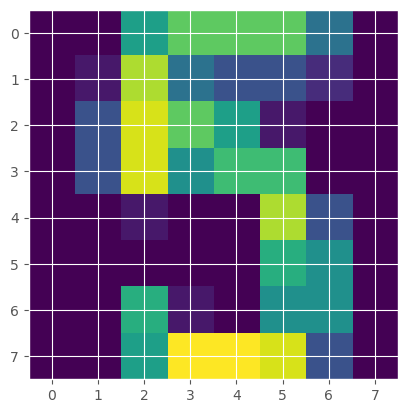

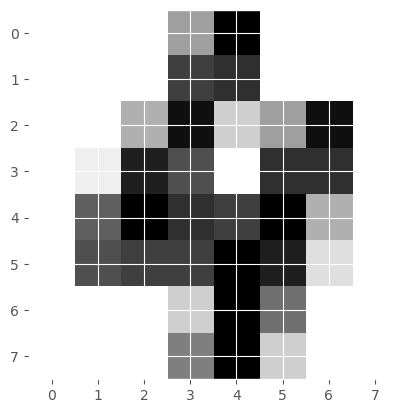

In [17]:
from sklearn import datasets
import matplotlib.pyplot as plt

digits = datasets.load_digits()

print(f'keys of digits: {digits.keys()}')

print(f'description of digits: {digits.DESCR}')

# * display digit 1010
plt.imshow(digits.images[1010])
plt.show()

plt.imshow(digits.images[1011], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [18]:
print(digits.images[0].shape)

(8, 8)


In [19]:
print(digits.data)
print(type(digits.data))

print(digits.target)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
<class 'numpy.ndarray'>
[0 1 2 ... 8 9 8]


In [20]:
from sklearn.model_selection import train_test_split

# create feature and target arrays
X = digits.data
y = digits.target

# split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# create a knn-classifier with 7 neighbors
knn = KNeighborsClassifier(n_neighbors=7)

# fit the classifier to the training data 
knn.fit(X_train, y_train)

# print the accuracy
print(f'the accuracy of KNN classifier with 7 neighbors is: {knn.score(X_test, y_test)}')

the accuracy of KNN classifier with 7 neighbors is: 0.9833333333333333


In [21]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9) # * -> 1 - 8
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

print(len(neighbors))

8


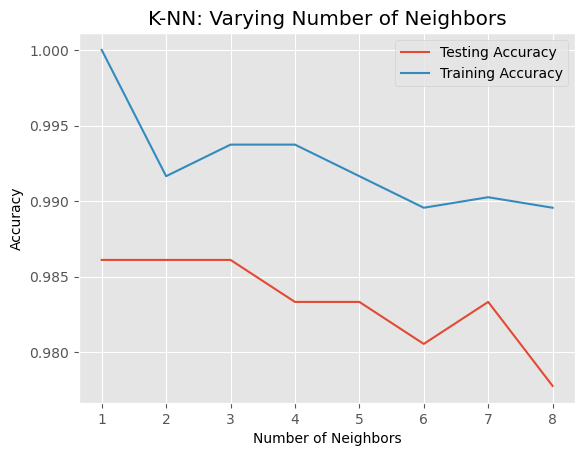

In [22]:
# TODO: loop over different values of k
for i, k in enumerate(neighbors):
    
    # setup a knn classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors = k)
    
    # fit this classifier to the training data
    knn.fit(X_train, y_train)
    
    # compute accuracy on the training data
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)
    
    
# generate a plot
plt.title('K-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')

plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

# Regression
- another type of supervised learning problem, (vs.classification)
- Now the target is continuously varying variable.


## Boston housing data
- dataset: `boston.csv`
- EDA:

In [23]:
boston = pd.read_csv('boston.csv')
print(boston.head())

      CRIM    ZN  INDUS  CHAS     NX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


### Recall: 
- scikit learn wants **features** and **target** values in distinct arrays.
  - 1. select dependent and independent variables
  - 2. use `.values`  to transfer DataFrame into Numpy arrays

In [31]:
X = boston.drop('MEDV', axis=1).values
y = boston['MEDV'].values

# * Try to predict the price from a single feature: the number of rooms
X_rooms = X[:, 5]
print(f'the type of X_rooms:{type(X_rooms)} and shape of X_rooms: {X_rooms.shape}')
print(f'the type of y: {type(y)} and shape of y: {y.shape}')

# ls : reshape(-1, 1)
X_rooms = X_rooms.reshape(-1, 1)
y = y.reshape(-1, 1)

print(f'the type of X_rooms:{type(X_rooms)} and shape of X_rooms: {X_rooms.shape}')
print(f'the type of y: {type(y)} and shape of y: {y.shape}')

the type of X_rooms:<class 'numpy.ndarray'> and shape of X_rooms: (506,)
the type of y: <class 'numpy.ndarray'> and shape of y: (506,)
the type of X_rooms:<class 'numpy.ndarray'> and shape of X_rooms: (506, 1)
the type of y: <class 'numpy.ndarray'> and shape of y: (506, 1)


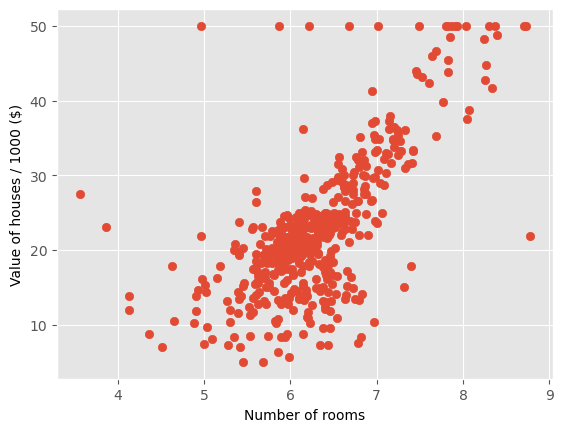

In [32]:
# plotting house values vs. number of rooms
plt.scatter(X_rooms, y)
plt.ylabel('Value of houses / 1000 ($)')
plt.xlabel('Number of rooms')
plt.show()


## Fitting a regression model
- fit a regression model to our data:
  - model: linear regression

In [33]:
# import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_rooms, y) # * just like in classification

prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1, 1)

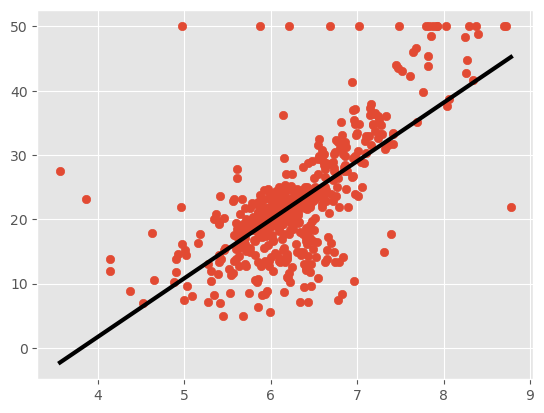

In [34]:
plt.scatter(X_rooms, y)

# * 直接在plot函数中基于特征值做预测:
plt.plot(prediction_space, reg.predict(prediction_space), color='black', linewidth=3)
plt.show()

## e.g. dataset : Gapminder
- `gm_2008_region.csv`


In [35]:
# import numpy as np
# import pandas as pd

df = pd.read_csv('gm_2008_region.csv')
print(df.head())

   population  fertility  HIV        CO2  BMI_male      GDP  BMI_female  life  \
0  34811059.0       2.73  0.1   3.328945  24.59620  12314.0    129.9049  75.3   
1  19842251.0       6.43  2.0   1.474353  22.25083   7103.0    130.1247  58.3   
2  40381860.0       2.24  0.5   4.785170  27.50170  14646.0    118.8915  75.5   
3   2975029.0       1.40  0.1   1.804106  25.35542   7383.0    132.8108  72.5   
4  21370348.0       1.96  0.1  18.016313  27.56373  41312.0    117.3755  81.5   

   child_mortality                      Region  
0             29.5  Middle East & North Africa  
1            192.0          Sub-Saharan Africa  
2             15.4                     America  
3             20.0       Europe & Central Asia  
4              5.2         East Asia & Pacific  


In [38]:
# * create arrays for features and target variable
y = df['life'].values
X = df['fertility'].values

# dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print(f'Dimensions of X before reshaping: {X.shape}')

# TODO: reshape X and y
y_reshaped = y.reshape(-1, 1)
X_reshaped = X.reshape(-1, 1)

# dimensions of X and y after reshaping
print("\nDimensions of y after reshaping: ", y_reshaped.shape)
print('Dimensions of x after reshaping: ', X_reshaped.shape)

Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)

Dimensions of y after reshaping:  (139, 1)
Dimensions of x after reshaping:  (139, 1)


/var/folders/c0/br_156ln70b9crg_0k9vfs440000gn/T/ipykernel_72327/716346565.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), square=True, cmap='RdYlGn')


<Axes: >

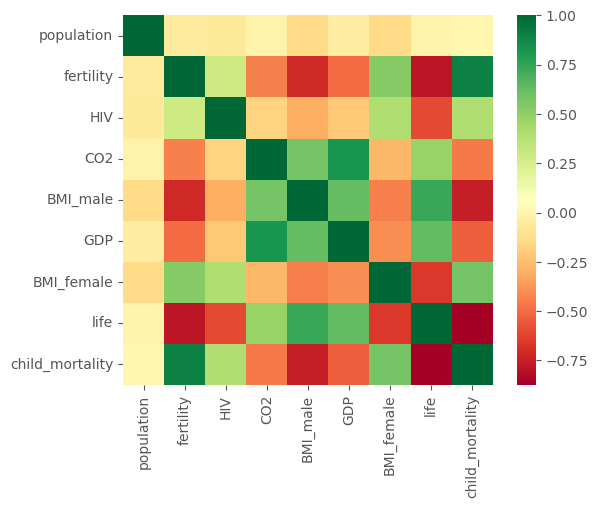

In [39]:
# TODO: exploring the gapminder data:
import seaborn as sns 

sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

### Regression mechanics
- minimize the error function 
  - vertical distance between the fit and the data

- the distance is called a **residual**
- -> we try to minimize the **sum of the square of the residuals**
- OLS: ordinary least squares


LR in higher dimensions: 
- such as 2 features and 1 target
- also pass 2 arrays: Features and Targets

Default scoring method of LR: $R^2$
To calculate : pass test data and test target to `score()`

In [40]:
# TODO: use all features of boston housing price to fit a model
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression

y = boston['MEDV'].values
X = boston.drop('MEDV', axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
reg_all = LinearRegression()

reg_all.fit(X_train, y_train)
y_pred_boston = reg_all.predict(X_test)
reg_all.score(X_test, y_test)

0.7112260057484963

0.6192442167740038


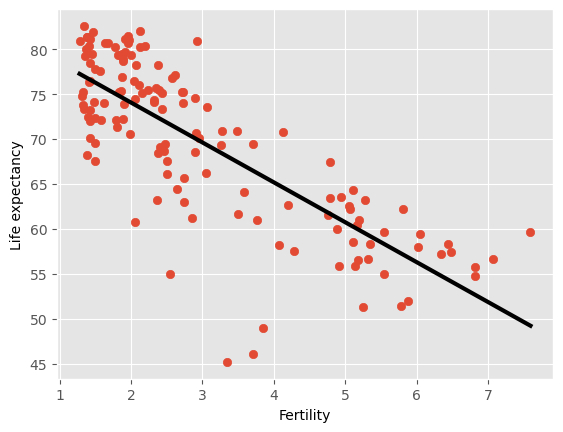

In [47]:
# TODO: Gapminder: to fit a linear regression and then predict the life expectancy, using fertility
# from sklearn.linear_model import LinearRegression

X_fertility = df.fertility.values.reshape(-1, 1)
y = df.life.values.reshape(-1, 1)

reg = LinearRegression()

# TODO: create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1, 1)

# fit the model to the data
reg.fit(X_fertility, y)

# TODO: predict over the prediction_space: y_pred
y_pred = reg.predict(prediction_space)

# print R^2
print(reg.score(X_fertility, y))

# TODO: plot regression line in the scatter plot:
plt.scatter(X_fertility, y)
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.xlabel('Fertility')
plt.ylabel('Life expectancy')
plt.show()


### Train/test split for regression
train and test sets are vital to ensure that your supervised learning model is **able to generalize well to new data**. This was true for classification models, and is *equally true for linear regression models.* 

- split the Gapminder dataset into training and testing sets, and then fit and predict a linear regression over **all** features.

In [54]:
# ! TIPP: string --> number
# import pandas as pd

# TODO 1. pandas.get_dummies()
# 假设 df 是包含字符串列的 DataFrame
df_pandas_dummy = pd.DataFrame({'Category': ['A', 'B', 'A', 'C'],'Value': [1.1, 2.2, 3.3, 4.4]})

# 使用独热编码
df_encoded_pandas_dummy = pd.get_dummies(df_pandas_dummy, columns=['Category'], prefix=['Category'])

print(df_encoded_pandas_dummy)

# TODO 2. sklearn: LabelEncoder

from sklearn.preprocessing import LabelEncoder

df_sk_label = pd.DataFrame({
    'Category': ['A', 'B', 'A', 'C'],
    'Value':[1.1, 1.2, 3.3, 4.4]
})

label_encoder = LabelEncoder()
df_sk_label['Category'] = label_encoder.fit_transform(df_sk_label['Category'])

print(df_sk_label)


   Value  Category_A  Category_B  Category_C
0    1.1           1           0           0
1    2.2           0           1           0
2    3.3           1           0           0
3    4.4           0           0           1
   Category  Value
0         0    1.1
1         1    1.2
2         0    3.3
3         2    4.4


In [58]:
print(df.info()) # --> 9   Region           139 non-null    object 

# TODO: to transfer str into num
# from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Region'] = label_encoder.fit_transform(df.Region)
print(df.info())

y_train_test_split = df.life.values.reshape(-1, 1)
X_train_test_split = df.drop('life', axis= 1).values

print(y_train_test_split.shape)
print(X_train_test_split.shape)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   population       139 non-null    float64
 1   fertility        139 non-null    float64
 2   HIV              139 non-null    float64
 3   CO2              139 non-null    float64
 4   BMI_male         139 non-null    float64
 5   GDP              139 non-null    float64
 6   BMI_female       139 non-null    float64
 7   life             139 non-null    float64
 8   child_mortality  139 non-null    float64
 9   Region           139 non-null    object 
dtypes: float64(9), object(1)
memory usage: 11.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   population       139 non-null    float64
 1   fertility        139 non-null    floa

In [59]:


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train_test_split, y_train_test_split, test_size=0.3, random_state=42)

reg_all_gapminder = LinearRegression()

# TODO: fit the regressor to the training data
reg_all_gapminder.fit(X_train, y_train)

# TODO: prediction on the test data: y_pred
y_pred = reg_all_gapminder.predict(X_test)

# TODO: compute and print R^2 and RMSE
print("R^2: {}".format(reg_all_gapminder.score(X_test, y_test)))

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')

R^2: 0.8376147251418844
Root Mean Squared Error: 3.251931065411274


# Cross Validation
- pitfall of $R^2$ and train_test_split process:
  - the $R^2$ returned is dependent on the way that we split up our data
  - -> Cross-validation

Steps:
1. hold out the **first fold** as a test set
2. fit our model on the remaining folds (here: 4 remaining folds)
3. predict on the test set and compute the metric of interest
4. repeat this process with the **second fold** as test set and so on


If we split the dataset into 5 folds, then it is called *5-fold CV*

> Trade-off
> more folds --> more computational expensive, because we are then fitting and predicting more times

In [61]:
from sklearn.model_selection import cross_val_score
# from sklearn.linear_model import LinearRegression

reg = LinearRegression()

# * cv_results: array of CV-scores, default score for LR: R^2
cv_results = cross_val_score(reg, X_train_test_split, y_train_test_split, cv=5)

print(cv_results) # * length of the array == no.folds

print("Average 5-fold CV Score: {}".format(np.mean(cv_results)))

[0.81152772 0.82723008 0.90453285 0.8085304  0.94433861]
Average 5-fold CV Score: 0.8592319317593841


# Regularized regression
fitting a linear regression model means:
- minimize a loss function to choose a coefficient $a_i$ for each feature variable


If we allow these coefficients or parameters to be super large, we can get **overfitting**
- -> alter the loss function so that it penalizes for large coefficients
    - ***regularization***

## 1. Ridge regression
- Loss function = OLS loss function + 
$$
\alpha * \sum_{i=1}^n a_i^2
$$

- Thus, when minimizing the loss function to fit to our data, models are penalized for coefficients with **a large magnitude**: large positive and large negative coefficients

### Hyperparameter tuning
- $\alpha$ is the hyperparameter that we need to choose, which is similar to picking k in KNN
- a large $\alpha$ means that *large coefficients are significantly penalized*, which can lead to a model that is too simple and ends up **underfitting** the data.
- $\alpha = 0$ : we go back to OLS and can lead to **overfitting**


In [67]:
# Bsp. with gapminder: X_train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X_train_test_split, y_train_test_split, test_size=0.3, random_state=42)

# * make the variables on the same scale:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# create Ridge model and fit it on scaled training set
ridge = Ridge(alpha=0.1)
ridge.fit(X_train_scaled, y_train)
ridge_pred = ridge.predict(X_test_scaled)
ridge_score = ridge.score(X_test_scaled, y_test)

print(f'Ridge regression score: {ridge_score}')

Ridge regression score: 0.7943081102839463


# 2. Lasso regression
- Loss function = OLS loss function + 
$$
\alpha * \sum_{i=1}^n |a_i|
$$

## Lasso regression for feature selection
- Lasso regression can be used to select **important features of a dataset**
- because: 
  - it trends to shrink the coefficients of less important features to be exactly 0
  - the features whose coefficients are not shrunk to 0 are **selected** by the lasso algorithm

In [68]:
from sklearn.linear_model import Lasso

X_train, X_test, y_train, y_test = train_test_split(X_train_test_split, y_train_test_split, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_lasso_scaled = scaler.fit_transform(X_train)
X_test_lasso_scaled = scaler.fit_transform(X_test)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train_lasso_scaled, y_train)
lasso_pred = lasso.predict(X_test_lasso_scaled)

print(f'Lasso regression score: {lasso.score(X_test_scaled, y_test)}')

Lasso regression score: 0.8077560293543734


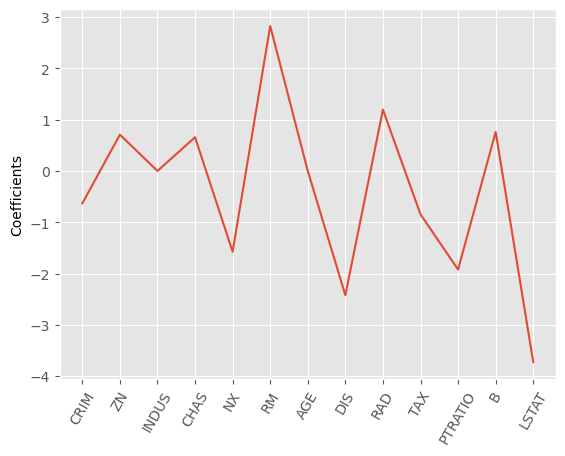

In [70]:
'''lasso feature selection in scikit-learn - use coefficients'''
# from sklearn.linear_model import Lasso
names = boston.drop('MEDV', axis=1).columns
y = boston['MEDV'].values.reshape(-1, 1)
X = boston.drop('MEDV', axis=1).values

scaler_boston = StandardScaler()
X = scaler_boston.fit_transform(X)

lasso_coef = lasso.fit(X, y).coef_
_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation=60)
_ = plt.ylabel('Coefficients')
plt.show() # * the most important feature is RM, the number of rooms

## Regularization I: lasso regression with gapminder

In [71]:
'''lasso regression with gapminder'''
df_gap = pd.read_csv('gm_2008_region.csv')
print(df_gap.columns)

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region'],
      dtype='object')


In [72]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df_gap['Region'] = encoder.fit_transform(df_gap['Region'])
print(df_gap.head())

   population  fertility  HIV        CO2  BMI_male      GDP  BMI_female  life  \
0  34811059.0       2.73  0.1   3.328945  24.59620  12314.0    129.9049  75.3   
1  19842251.0       6.43  2.0   1.474353  22.25083   7103.0    130.1247  58.3   
2  40381860.0       2.24  0.5   4.785170  27.50170  14646.0    118.8915  75.5   
3   2975029.0       1.40  0.1   1.804106  25.35542   7383.0    132.8108  72.5   
4  21370348.0       1.96  0.1  18.016313  27.56373  41312.0    117.3755  81.5   

   child_mortality  Region  
0             29.5       3  
1            192.0       5  
2             15.4       0  
3             20.0       2  
4              5.2       1  


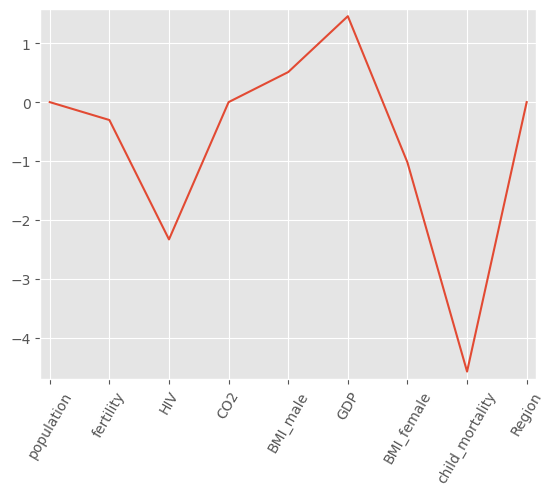

In [78]:
y = df_gap['life'].values.reshape(-1, 1)
X = df_gap.drop('life', axis=1).values

scaler = StandardScaler()
X = scaler.fit_transform(X)

lasso = Lasso(alpha=0.4)
lasso.fit(X, y)

lasso_coef = lasso.fit(X, y).coef_

plt.plot(range(len(df_gap.columns)-1), lasso_coef) # ! range(len(df_gap)) excludes the max value, range(10) means [0, 1, ..., 9]
plt.xticks(range(len(df_gap.columns)-1), df_gap.drop('life', axis=1).columns.values, rotation = 60)
plt.margins(0.02)
plt.show()


In [75]:
for i in range(len([1, 2])):
    print(i)

0
1


# Fine-tuning our model

## Classification metrics
We can use **accuracy**, the fraction of correctly classified samples, to measure model performance. *However, accuracy is not always a useful metric.*

### Class imbalance
An example of Class imbalance is spam detection. That is, one class is more frequent 
- Because the class of real emails contains way more instances than the class of spam

## Confusion Matrix
|  | Predicted: Spam | Predicted: Real|
|--|-----------------|----------------|
|Actual: Spam | TP   |   FN          |
| Actual: Real | FP | TN |

- we need to fill in the confusion matrix with labeled emails according to the predictions.
- Usually, the class of interest is called **positive class**. As we are trying to detect spam, this makes spam the **positive class**.


## Metrics from the Confusion Matrix
### Accuracy
$$
\frac{tp + tn}{tp + tn + fp + fn}
$$

### Precision (positive predicted value, PPV)
$$
\frac{tp}{tp + fp}
$$
- the number of correctly labeled instances divided by the total number of instances that are predicted as **positive class**
- high Precision: Not many real emails are predicted as spam

### Recall (sensitivity, hit rate)
$$
\frac{tp}{tp + fn}
$$
- high recall: predicted most spam emails correctly
